# Popularity of Hacker News “Ask HN” and “Show HN” posts

[Hacker News](https://news.ycombinator.com/) is a popular link sharing platform focusing on information technology, hacking, and start-ups. 
Users can upvote or comment on posts published by each others, and the most popular ones are sent to all members in a daily nesletter, strongly increasing its visibility.
In this project, we want to determine what is the optimal posting time to maximise the popularity of a post.

Our main results are: 
* “Ask HN” posts created between 15:00 and 16:00 US Eastern Time receive significantly more comments than others.
* More generally, posts created between 12:00 and 16:00 US Easter Time tend to be more popular.

## The Dataset

The dataset `N_posts_year_to_Sep_26_2016.csv` was downloaded from [this link](https://www.kaggle.com/hacker-news/hacker-news-posts/download) on 8 October 2019. Information on the dataset can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts). 

It contains information on Hacker News posts from the 12 months before September 16 2016, scrapped by Hacker News using a fork of Minimaxir's HN scrapper available [here](https://github.com/minimaxir/get-all-hacker-news-submissions-comments). (An update from August 7th 2017 suggests using BigQuery instead to scrape new data.) 

Each line corresponds to one post on Hacker news. The columns are: 
* `id`: the unique identifier Hacker News assigned to the post
* `title`: title of the post
* `url`: hyperlink of the item referred to in the post, if there is one
* `num_points`: the number of upvotes the post received minus the number of downvotes (it is not clear from the dataset's page that downvotes are included, but they seem to be included according to [this page](https://app.dataquest.io/m/356/guided-project%3A-exploring-hacker-news-posts))
* `num_comments`: the number of comments the post received
* `author`: the name of the account which made the post
* `created_at`: the date and time the post was made, in US Eastern Time (EST)

Our aim in this short project is to determine the properties of the most popular posts, based on the number of positive votes minus negative votes they got and on the number of comments. In particular, we will compare the popularity of “Ask HN” (where users ask the Hacker News community a specific question) and “How HN” (where users show the Hacker news community something interesting, like a project, product, or idea) posts. We will also determine if posts created at a certain time are more popular on average.

Let us first import the content of `HN_posts_year_to_Sep_26_2016.csv` into the list of lists `hn` and display the first 10 rows using the `pandas` library:

In [1]:
num_rows = 10 # number of rows shoen
import pandas as pd
from csv import reader

hn = list(reader(open('HN_posts_year_to_Sep_26_2016.csv')))
pd.DataFrame(hn[1:num_rows+1], columns = hn[0], index = range(1,num_rows+1))

,id,title,url,num_points,num_comments,author,created_at
1,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
2,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
3,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
4,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
5,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14
6,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13
7,12578954,Macalifa A new open-source music app for UWP ...,http://forums.windowscentral.com/windows-phone...,1,0,thecodrr,9/26/2016 3:06
8,12578942,GitHub theweavrs/Macalifa: A music player wri...,https://github.com/theweavrs/Macalifa,1,0,thecodrr,9/26/2016 3:04
9,12578919,Google Allo first Impression,http://prodissues.com/2016/09/google-allo-firs...,3,0,jandll,9/26/2016 2:57
10,12578918,Advanced Multimedia on the Linux Command Line,https://avi.alkalay.net/2016/09/multimedia-lin...,1,0,mynameislegion,9/26/2016 2:56


In the following, we will be interested only in posts which received at least one comment. We extract the corresponding rows in the list of lists `hn_c`. We also extract the header in the list `headers`.

In [2]:
headers = hn[0]
hn_c = [row for row in hn[1:] if row[4] != '0']
print('hn_c has {} rows'.format(len(hn_c)))
pd.DataFrame(hn_c[:num_rows], columns = headers, index = range(1,num_rows+1))

hn_c has 80401 rows


,id,title,url,num_points,num_comments,author,created_at
1,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13
2,12578908,Ask HN: What TLD do you use for local developm...,,4,7,Sevrene,9/26/2016 2:53
3,12578822,Amazons Algorithms Dont Find You the Best Deals,https://www.technologyreview.com/s/602442/amaz...,1,1,yarapavan,9/26/2016 2:26
4,12578694,Emergency dose of epinephrine that does not co...,http://m.imgur.com/gallery/th6Ua,2,1,dredmorbius,9/26/2016 1:54
5,12578624,Phone Makers Could Cut Off Drivers. So Why Don...,http://www.nytimes.com/2016/09/25/technology/p...,4,1,danso,9/26/2016 1:37
6,12578556,"OpenMW, Open Source Elderscrolls III: Morrowin...",https://openmw.org/en/,32,3,rocky1138,9/26/2016 1:24
7,12578522,Ask HN: How do you pass on your work when you ...,,6,3,PascLeRasc,9/26/2016 1:17
8,12578311,Americas Lost Boys: Men who choose video games...,https://www.firstthings.com/blogs/firstthought...,5,1,jseliger,9/26/2016 0:31
9,12578212,A Walking Tour of New Yorks Massive Surveillan...,https://theintercept.com/2016/09/24/a-walking-...,7,1,bootload,9/26/2016 0:06
10,12578186,Job app website farms my social network links....,,1,1,macscam,9/26/2016 0:02


## Extraction of “Ask HN” and “Show HN” rows

We now divide `hn_c` in three lists: `ask_posts` will contains all rows with the `title` entry beginning with `Ask HN` and case variations, `show_posts` will contains all rows with `title` entry beginning with `Show HN` and case variations, and `other_posts` will contain all other rows. 

In [3]:
str_num_rows = 'There are {} posts starting with {} (or a case  variation).'

ask_posts = []
show_posts = []
other_posts = []
for row in hn_c:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

print(str_num_rows.format(len(ask_posts), 'Ask HN'))
print(str_num_rows.format(len(show_posts), 'Show HN'))
print('There are {} other posts.'.format(len(other_posts)))

# Check that the total number of posts is correct:
print('The total number of posts is {}.'.format(len(ask_posts) + len(show_posts) + len(other_posts)))

There are 6911 posts starting with Ask HN (or a case  variation).
There are 5059 posts starting with Show HN (or a case  variation).
There are 68431 other posts.
The total number of posts is 80401.


We now want to see which of the “ask” or “show” posts receive the most comments and upvotes (minus downvotes) on average. To this end, we first define the function `average_col` taking as arguments a list of lists `dset` and an index `i`, and returning the average of the `i`th entries of the rows in `dset` (assumed to be numbers).

In [4]:
def average_col(dset,i):
    '''
    returns the average of the ith entries of the rows of dset
    
    return type: float
    dset: list of lists
    i: integer
    
    assumption: each element of dset has at least i+1 elements, and its ith 
    element can be confverted to a float
    '''
    total = 0.
    
    for row in dset:
        total = total + float(row[i])

    return  total / len(dset)

We now use it to compute the average numbers of comments and upvotes (minus downvotes) for these two kinds of posts, as well as for the other posts, rouned to two digits afte the point: 

In [5]:
phrase = 'The average {} for {} posts is: {}.'

index_num_comments = 4
index_num_upvotes = 3

ave_comments_ask = average_col(ask_posts, index_num_comments)
ave_comments_show = average_col(show_posts, index_num_comments)
ave_comments_other = average_col(other_posts, index_num_comments)
ave_upvotes_ask = average_col(ask_posts, index_num_upvotes)
ave_upvotes_show = average_col(show_posts, index_num_upvotes)
ave_upvotes_other = average_col(other_posts, index_num_upvotes)

print(phrase.format('number of comments', 'Ask HN', round(ave_comments_ask,2)))
print(phrase.format('number of comments', 'Show HN', round(ave_comments_show,2)))
print(phrase.format('number of comments', 'other', round(ave_comments_other,2)))
print(phrase.format('number of upvotes', 'Ask HN', round(ave_upvotes_ask,2)))
print(phrase.format('number of upvotes', 'Show HN', round(ave_upvotes_show,2)))
print(phrase.format('number of upvotes', 'other', round(ave_upvotes_other,2)))

The average number of comments for Ask HN posts is: 13.74.
The average number of comments for Show HN posts is: 9.81.
The average number of comments for other posts is: 25.84.
The average number of upvotes for Ask HN posts is: 14.4.
The average number of upvotes for Show HN posts is: 26.62.
The average number of upvotes for other posts is: 53.43.


The most popular posts for the numbers of comments and upvotes seem to be those which are not “Ask HN” nor “Show HN”. Discriminating between the “Ask HN” and “Show HN” is more difficult: the former receive approximately 50% more comments on average but have a significantly smaller number of upvotes. This seems to make sense: “Ask HN” posts explicitly ask for an answer to a question and are thus meant to attract comments, while “Show HN” posts, showing something interesting to the community, are meant to be appreciated and thus attract upvotes.

Before jumping to conlucions, let us compute the standard errors for each of these 6 numbers. To this end, we first define the function `ste_col` taking as arguments a list of lists `dset` and an index `i`, and returning the standard error of the `i`th entries of the rows in `dset` (assumed to be numbers).

In [6]:
from numpy import sqrt
def ste_col(dset,i):
    '''
    returns the standard error of the ith entries of the rows of dset
    
    return type: float
    dset: list of lists
    i: integer
    
    assumption: each element of dset has at least i+1 elements, and its ith 
    element can be confverted to a float
    '''
    ave = average_col(dset,i)
    sst = 0.
    
    for row in dset:
        sst = sst + (float(row[i]) - ave)**2

    return  sqrt(sst)/ len(dset)

In [7]:
phrase = 'The standard error of the {} for {} posts is: {}.'

index_num_comments = 4
index_num_upvotes = 3

ste_comments_ask = ste_col(ask_posts, index_num_comments)
ste_comments_show = ste_col(show_posts, index_num_comments)
ste_comments_other = ste_col(other_posts, index_num_comments)
ste_upvotes_ask = ste_col(ask_posts, index_num_upvotes)
ste_upvotes_show = ste_col(show_posts, index_num_upvotes)
ste_upvotes_other = ste_col(other_posts, index_num_upvotes)

print(phrase.format('number of comments', 'Ask HN', round(ste_comments_ask,2)))
print(phrase.format('number of comments', 'Show HN', round(ste_comments_show,2)))
print(phrase.format('number of comments', 'other', round(ste_comments_other,2)))
print(phrase.format('number of upvotes', 'Ask HN', round(ste_upvotes_ask,2)))
print(phrase.format('number of upvotes', 'Show HN', round(ste_upvotes_show,2)))
print(phrase.format('number of upvotes', 'other', round(ste_upvotes_other,2)))

The standard error of the number of comments for Ask HN posts is: 0.6.
The standard error of the number of comments for Show HN posts is: 0.31.
The standard error of the number of comments for other posts is: 0.21.
The standard error of the number of upvotes for Ask HN posts is: 0.58.
The standard error of the number of upvotes for Show HN posts is: 0.99.
The standard error of the number of upvotes for other posts is: 0.42.


These 6 standard errors are all smaller than 1, so the square root of the sum of the squares of two of them is always smaller than 2. (We remind that the standard error on the difference between two independent random variables is the square root of the sum of their squared standard errors.) Actually, the largest relevent value is smaller than 1.2: 

In [8]:
# we assume that the standard erros are all different

list1 = [ste_comments_ask, ste_comments_show, ste_comments_other]
list2 = [ste_upvotes_ask, ste_upvotes_show, ste_upvotes_other]

max1 = max([sqrt(x1**2 + x2**2) for x1 in list1 for x2 in list1 if x1 != x2])
max2 = max([sqrt(x1**2 + x2**2) for x1 in list2 for x2 in list2 if x1 != x2])
max([max1, max2])

1.1436761221017235

Since the differences between the average numbers of comments or upvotes between two types of posts are all larger than 3.9, the z-scores for these differences are all larger than 3.25. **The differences between the average numbers of comments or upvotes between two types of posts thus seem statistically significant.**

## Dependence of the number of comments on the creation time for “Ask HN” posts

In this section we focus specifically on “Ask HN” posts, which receive, on average, more comments than “Show HN” ones. We discard the other posts, as this category is less clearly defined. 
In the following cell, we compute the average number of comments for posts published by hour created using the `datetime` module. To see whether the differences are significant, we compute the standard deviations.

In [9]:
import datetime as dt
import matplotlib.pyplot as plt # for the plot

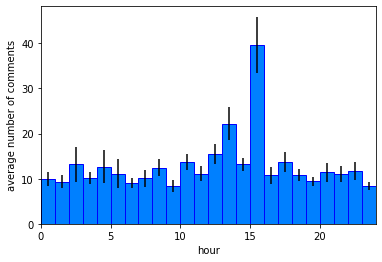

In [10]:
def plot_xyz(data, xlabel='$x$', ylabel='$y$', width=1, yorigin=0):
    '''
    plots the graph of y(x) with standard error z(x) from data in the form 
    [[x_1, y_1, z_1], [x_2, x_2, z_2], ...]

    data: list of lists of three floats or integers
    '''
    x = []
    y = []
    z = []
    for xyz in data: 
        x.append(xyz[0])
        y.append(xyz[1] - yorigin)
        z.append(xyz[2]) # relative error
    plt.bar(x, y, width=width, color=(0,0.5,1), edgecolor='blue', align='edge', yerr=z)
    plt.xlim(data[0][0], 2*data[-1][0]-data[-2][0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# list containing the creation hour and number of comments of each `Ask HN` 
# post
created_at_AskHN = []

# dictionary containing the number of posts created during each hour
counts_by_hour_AskHN = {}

# dictionary containing the number of comments for posts created during each 
# hour
comments_by_hour = {}

# dictionary containing the sum of squared numbers of comments for posts 
# created during each hour
sq_comments_by_hour = {}

# list containing the set of hours, average numbers of comments, and standard 
# deviations
ave_comments_per_hour = []

for row in ask_posts: 
    time_created = dt.datetime.strptime(row[6], '%m/%d/%Y %H:%M')
    hour_created = time_created.hour
    created_at_AskHN.append([hour_created, int(row[4])])
    # index 4: number of comments

for row in created_at_AskHN: 
    hour = row[0]
    val = row[1]
    if hour in counts_by_hour_AskHN:
        counts_by_hour_AskHN[hour] += 1
        comments_by_hour[hour] += val
        sq_comments_by_hour[hour] += val**2
    else: 
        counts_by_hour_AskHN[hour] = 1
        comments_by_hour[hour] = val
        sq_comments_by_hour[hour] = val**2

for key in counts_by_hour_AskHN:
    count = counts_by_hour_AskHN[key]
    n_comments = comments_by_hour[key]
    sq_n_comments = sq_comments_by_hour[key]
    ave = n_comments/count
    std = sqrt(sq_n_comments/count - ave**2)
    ste = std/sqrt(count)
    ave_comments_per_hour.append([key, ave, ste])
ave_comments_per_hour.sort()
    
plot_xyz(ave_comments_per_hour, xlabel='hour', ylabel='average number of comments')

The black bars show the one-standard-error interval.
**There is a statistically significant spike in the number of comments for “Ask HN” posts created between 15:00 and 16:00 US Eastern Time.**

Let us now sort the hours of the day by average number of comments an print the five ones with highest number:

In [11]:
phrase = '“Ask HN” posts created from {hour}:00 to {hour}:59 EST have an average of {n_comments:.1f}±{ste:.1f} comments.'
ave_comments_per_hour_sorted = sorted(ave_comments_per_hour, key = lambda l: l[1])[::-1]
for i in range(5):
    row = ave_comments_per_hour_sorted[i]
    print(phrase.format(hour=row[0], n_comments=row[1], ste=row[2]))

“Ask HN” posts created from 15:00 to 15:59 EST have an average of 39.7±6.2 comments.
“Ask HN” posts created from 13:00 to 13:59 EST have an average of 22.2±3.7 comments.
“Ask HN” posts created from 12:00 to 12:59 EST have an average of 15.5±2.3 comments.
“Ask HN” posts created from 10:00 to 10:59 EST have an average of 13.8±1.8 comments.
“Ask HN” posts created from 17:00 to 17:59 EST have an average of 13.7±2.2 comments.


Posts created between 15:00 and 16:00 EST receive, by a significant margin, the highest number of comments on average.

## Dependence of the number of upvotes on the creation time for “Show HN” posts

Let us now do a similar analysis for the number of upvotes (minus downvotes) of the “Show HN” posts. 

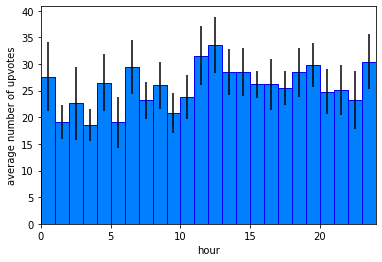

In [12]:
# list containing the creation hour and number of comments of each `Show HN`
# post
created_at_ShowHN = []

# dictionary containing the number of posts created during each hour
counts_by_hour_ShowHN = {}

# dictionary containing the number of upvotes for posts created during each
# hour
upvotes_by_hour = {}

# dictionary containing the sum of squared numbers of upvotes for posts 
# created during each hour
sq_upvotes_by_hour = {}

# list containing the set of hours, average numbers of upvotes, and standard 
# deviations
ave_upvotes_per_hour = []

for row in show_posts: 
    time_created = dt.datetime.strptime(row[6], '%m/%d/%Y %H:%M')
    hour_created = time_created.hour
    created_at_ShowHN.append([hour_created, int(row[3])]) 
    # index 3: number of upvotes

for row in created_at_ShowHN: 
    hour = row[0]
    val = row[1]
    if hour in counts_by_hour_ShowHN:
        counts_by_hour_ShowHN[hour] += 1
        upvotes_by_hour[hour] += val
        sq_upvotes_by_hour[hour] += val**2
    else: 
        counts_by_hour_ShowHN[hour] = 1
        upvotes_by_hour[hour] = val
        sq_upvotes_by_hour[hour] = val**2

for key in counts_by_hour_ShowHN:
    count = counts_by_hour_ShowHN[key]
    n_upvotes = upvotes_by_hour[key]
    sq_n_upvotes = sq_upvotes_by_hour[key]
    ave = n_upvotes/count
    std = sqrt(sq_n_upvotes/count - ave**2)
    ste = std/sqrt(count)
    ave_upvotes_per_hour.append([key, ave, ste])
ave_upvotes_per_hour.sort()
    
plot_xyz(ave_upvotes_per_hour, xlabel='hour', ylabel='average number of upvotes')

**There seems to be no statistically significant variation during the day.** Let us nonetheless print the five most promising hours:

In [13]:
phrase = '“Show HN” posts created from {hour}:00 to {hour}:59 EST have an average of {n_upvotes:.1f}±{ste:.1f} upvotes.'
ave_upvotes_per_hour_sorted = sorted(ave_upvotes_per_hour, key = lambda l: l[1])[::-1]
for i in range(5):
    row = ave_upvotes_per_hour_sorted[i]
    print(phrase.format(hour=row[0], n_upvotes=row[1], ste=row[2]))

“Show HN” posts created from 12:00 to 12:59 EST have an average of 33.6±5.3 upvotes.
“Show HN” posts created from 11:00 to 11:59 EST have an average of 31.6±5.6 upvotes.
“Show HN” posts created from 23:00 to 23:59 EST have an average of 30.4±5.1 upvotes.
“Show HN” posts created from 19:00 to 19:59 EST have an average of 29.8±4.2 upvotes.
“Show HN” posts created from 6:00 to 6:59 EST have an average of 29.4±5.1 upvotes.


Creating a “Show HN” post around noon EST seems optimum to maximize the number of upvotes, although the large standard error prevents us from reaching any firm conclusion. To try to better see what happens, let us group the posts created within the same interval of 4 hours:

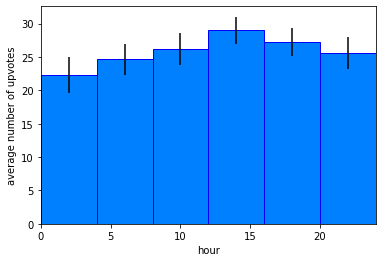

In [14]:
# number of hours per group
ngroup = 4

# list containing the creation hour and number of comments of each `Show HN`
# post
created_at_ShowHN = []

# dictionary containing the number of posts created during each hour
counts_by_hour_ShowHN = {}

# dictionary containing the number of upvotes for posts created during each
# hour
upvotes_by_hour = {}

# dictionary containing the sum of squared numbers of upvotes for posts 
# created during each hour
sq_upvotes_by_hour = {}

# list containing the set of hours, average numbers of upvotes, and standard 
# deviations
ave_upvotes_per_hour = []

for row in show_posts: 
    time_created = dt.datetime.strptime(row[6], '%m/%d/%Y %H:%M')
    hour_created = time_created.hour
    hour_created = hour_created - (hour_created % ngroup)
    created_at_ShowHN.append([hour_created, int(row[3])]) 
    # index 3: number of upvotes

for row in created_at_ShowHN: 
    hour = row[0]
    val = row[1]
    if hour in counts_by_hour_ShowHN:
        counts_by_hour_ShowHN[hour] += 1
        upvotes_by_hour[hour] += val
        sq_upvotes_by_hour[hour] += val**2
    else: 
        counts_by_hour_ShowHN[hour] = 1
        upvotes_by_hour[hour] = val
        sq_upvotes_by_hour[hour] = val**2

for key in counts_by_hour_ShowHN:
    count = counts_by_hour_ShowHN[key]
    n_upvotes = upvotes_by_hour[key]
    sq_n_upvotes = sq_upvotes_by_hour[key]
    ave = n_upvotes/count
    std = sqrt(sq_n_upvotes/count - ave**2)
    ste = std/sqrt(count)
    ave_upvotes_per_hour.append([key, ave, ste])
ave_upvotes_per_hour.sort()
    
plot_xyz(ave_upvotes_per_hour, xlabel='hour', ylabel='average number of upvotes', width = ngroup)

*Posts created between 12:00 and 16:00 EST seem to be receive the most upvotes on average*, while those created between 00:00 EST and 04:00 EST receive the least upvotes. But, once again, the standard errors are too big to reach any firm conclusion.

## What about the other posts?

The other posts are probably less interesting to study since their category is not as clearly defined as the other two. Let us nonetheless study their variations in the numbers of comments and upvotes with the creation time, to get a better feeling of how these quantities evolve. We are particularly interested in seeing whether the peak in the number of comments for “Ask HN” posts between 15:00 and 16:00 EST is also present for other posts. 

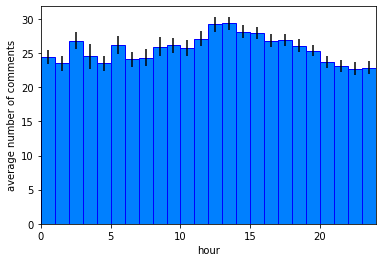

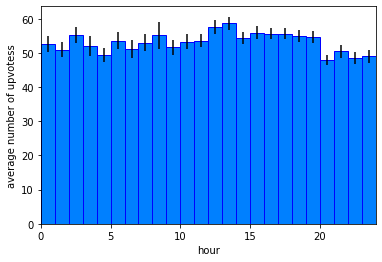

In [15]:
# list containing the creation hour, number of upvotes, and number of 
# comments of each of the other posts
created_at_other = []

# dictionary containing the number of posts created during each hour
counts_by_hour_other = {}

# dictionary containing the number of comments for posts created during each 
# hour
comments_by_hour_other = {}

# dictionary containing the number of upvotes for posts created during each 
# hour
upvotes_by_hour_other = {}

# dictionary containing the sum of squared numbers of comments for posts 
# created during each hour
sq_comments_by_hour_other = {}

# dictionary containing the sum of squared numbers of upvotes for posts 
# created during each hour
sq_upvotes_by_hour_other = {}

# list containing the set of hours, average numbers of comments, and standard 
# deviations
ave_comments_per_hour_other = []

# list containing the set of hours, average numbers of upvotes, and standard 
# deviations
ave_upvotes_per_hour_other = []

for row in other_posts: 
    time_created = dt.datetime.strptime(row[6], '%m/%d/%Y %H:%M')
    hour_created = time_created.hour
    created_at_other.append([hour_created, int(row[3]), int(row[4])])
    # index 3: number of upvotes
    # index 4: number of comments

for row in created_at_other: 
    hour = row[0]
    upvotes = row[1]
    comments = row[2]
    if hour in counts_by_hour_other:
        counts_by_hour_other[hour] += 1
        upvotes_by_hour_other[hour] += upvotes
        sq_upvotes_by_hour_other[hour] += upvotes**2
        comments_by_hour_other[hour] += comments
        sq_comments_by_hour_other[hour] += comments**2
    else: 
        counts_by_hour_other[hour] = 1
        upvotes_by_hour_other[hour] = upvotes
        sq_upvotes_by_hour_other[hour] = upvotes**2
        comments_by_hour_other[hour] = comments
        sq_comments_by_hour_other[hour] = comments**2

for key in counts_by_hour_other:
    count = counts_by_hour_other[key]
    n_upvotes = upvotes_by_hour_other[key]
    sq_n_upvotes = sq_upvotes_by_hour_other[key]
    n_comments = comments_by_hour_other[key]
    sq_n_comments = sq_comments_by_hour_other[key]
    ave_u = n_upvotes/count
    std_u = sqrt(sq_n_upvotes/count - ave_u**2)
    ste_u = std_u/sqrt(count)
    ave_c = n_comments/count
    std_c = sqrt(sq_n_comments/count - ave_c**2)
    ste_c = std_c/sqrt(count)
    ave_upvotes_per_hour_other.append([key, ave_u, ste_u])
    ave_comments_per_hour_other.append([key, ave_c, ste_c])
ave_upvotes_per_hour_other.sort()
ave_comments_per_hour_other.sort()
    
plot_xyz(ave_comments_per_hour_other, xlabel='hour', ylabel='average number of comments')
plot_xyz(ave_upvotes_per_hour_other, xlabel='hour', ylabel='average number of upvotess')

These two distributions look rather uniform, although posts created around noon EST seem to be a bit more popular than those created around midnight. To try and see this more clearly, let us divide the day into time intervals of 4 hours.

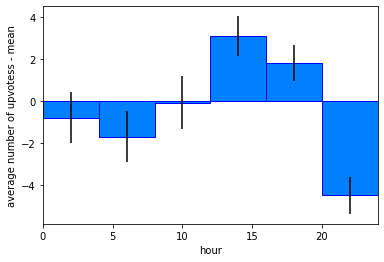

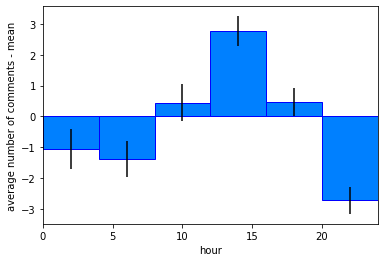

In [16]:
# number of hours per group
ngroup = 4

# number to be subtracted from the plot of the number of upvotes for visibility
origin_upvotes = ave_upvotes_other

# number to be subtracted from the plot of the number of commentss for 
# visibility
origin_comments = ave_comments_other

# list containing the creation hour, number of upvotes, and number of 
# comments of each of the other posts
created_at_other = []

# dictionary containing the number of posts created during each hour
counts_by_hour_other = {}

# dictionary containing the number of comments for posts created during each 
# hour
comments_by_hour_other = {}

# dictionary containing the number of upvotes for posts created during each 
# hour
upvotes_by_hour_other = {}

# dictionary containing the sum of squared numbers of comments for posts 
# created during each hour
sq_comments_by_hour_other = {}

# dictionary containing the sum of squared numbers of upvotes for posts 
# created during each hour
sq_upvotes_by_hour_other = {}

# list containing the set of hours, average numbers of comments, and standard 
# deviations
ave_comments_per_hour_other = []

# list containing the set of hours, average numbers of upvotes, and standard 
# deviations
ave_upvotes_per_hour_other = []

for row in other_posts: 
    time_created = dt.datetime.strptime(row[6], '%m/%d/%Y %H:%M')
    hour_created = time_created.hour
    hour_created = hour_created - (hour_created % ngroup)
    created_at_other.append([hour_created, int(row[3]), int(row[4])])
    # index 3: number of upvotes
    # index 4: number of comments

for row in created_at_other: 
    hour = row[0]
    upvotes = row[1]
    comments = row[2]
    if hour in counts_by_hour_other:
        counts_by_hour_other[hour] += 1
        upvotes_by_hour_other[hour] += upvotes
        sq_upvotes_by_hour_other[hour] += upvotes**2
        comments_by_hour_other[hour] += comments
        sq_comments_by_hour_other[hour] += comments**2
    else: 
        counts_by_hour_other[hour] = 1
        upvotes_by_hour_other[hour] = upvotes
        sq_upvotes_by_hour_other[hour] = upvotes**2
        comments_by_hour_other[hour] = comments
        sq_comments_by_hour_other[hour] = comments**2

for key in counts_by_hour_other:
    count = counts_by_hour_other[key]
    n_upvotes = upvotes_by_hour_other[key]
    sq_n_upvotes = sq_upvotes_by_hour_other[key]
    n_comments = comments_by_hour_other[key]
    sq_n_comments = sq_comments_by_hour_other[key]
    ave_u = n_upvotes/count
    std_u = sqrt(sq_n_upvotes/count - ave_u**2)
    ste_u = std_u/sqrt(count)
    ave_c = n_comments/count
    std_c = sqrt(sq_n_comments/count - ave_c**2)
    ste_c = std_c/sqrt(count)
    ave_upvotes_per_hour_other.append([key, ave_u, ste_u])
    ave_comments_per_hour_other.append([key, ave_c, ste_c])
ave_upvotes_per_hour_other.sort()
ave_comments_per_hour_other.sort()

plot_xyz(ave_upvotes_per_hour_other, xlabel='hour', ylabel='average number of upvotess - mean', width=ngroup, yorigin = origin_upvotes)
plot_xyz(ave_comments_per_hour_other, xlabel='hour', ylabel='average number of comments - mean', width=ngroup, yorigin = origin_comments)

This confirms the above observations. It seems that posts created between 12:00 and 16:00 EST are the most popular while those created between 20:00 EST and 24:00 EST are the least popular. Let us compute the z-scores.

In [17]:
phrase = 'z-score for the average number of {things} of other posts created in the 4-hours interval starting at {hour}:00 EST: {z_score:.2f}'
z_score_other_upvotes_noon = (ave_upvotes_per_hour_other[3][1] - ave_upvotes_other) / ave_upvotes_per_hour_other[3][2]
z_score_other_comments_noon = (ave_comments_per_hour_other[3][1] - ave_comments_other) / ave_comments_per_hour_other[3][2]
z_score_other_upvotes_midnight = (ave_upvotes_per_hour_other[5][1] - ave_upvotes_other) / ave_upvotes_per_hour_other[5][2]
z_score_other_comments_midnight = (ave_comments_per_hour_other[5][1] - ave_comments_other) / ave_comments_per_hour_other[5][2]
print(phrase.format(things = 'upvotes', hour = 12, z_score = z_score_other_upvotes_noon))
print(phrase.format(things = 'comments', hour = 12, z_score = z_score_other_comments_noon))
print(phrase.format(things = 'upvotes', hour = 20, z_score = z_score_other_upvotes_midnight))
print(phrase.format(things = 'comments', hour = 20, z_score = z_score_other_comments_midnight))

z-score for the average number of upvotes of other posts created in the 4-hours interval starting at 12:00 EST: 3.31
z-score for the average number of comments of other posts created in the 4-hours interval starting at 12:00 EST: 5.72
z-score for the average number of upvotes of other posts created in the 4-hours interval starting at 20:00 EST: -5.11
z-score for the average number of comments of other posts created in the 4-hours interval starting at 20:00 EST: -6.13


We conclude that:
* **Other posts created between 12:00 and 16:00 EST have more upvotes and comments on average, by more than 3 standard errors.**
* **Other posts created between 20:00 and 24:00 EST have less upvotes and comments on average, by more than 5 standard errors.**

## Relation between the numbers of comments and upvotes

In this section, we investigate whether there is a relation between the numbers of comments and upvotes of Hacker News posts. 

Let us first define a function computing the covariance between two variables.

In [18]:
import numpy as np # will be useful

def average(x):
    '''
    computes the average of x
    
    return type: float
    
    x: list or numpy array of floats or integers
    '''
    return np.sum(x)/len(x)

def covariance(x,y):
    '''
    returns the covariance of x and y
    
    return type: float

    x: list or numpy array of floats or integers
    y: list or numpy array of floats or integers with the same length as x
    '''

    ave_x = average(x)
    ave_y = average(y)
    ave_xy = np.sum(np.array(x)*np.array(y))/len(x)

    return ave_xy - ave_x*ave_y

We now use it to find the correlation coefficient and linear regression lines between two lists:

In [19]:
def lin_reg(x,y):
    '''
    returns the coefficients of the regression line and correlation coefficient r
    if the regression line has equation y = a*x+b, this function returns [a, b, r]
    
    return type: list of floats

    x: list or numpy array of floats or integers
    y: list or numpy array of floats or integers with the same length as x
    '''
    
    ave_x = average(x)
    ave_y = average(y)
    var_x = covariance(x,x)
    var_y = covariance(y,y)
    cov_x_y = covariance(x,y)
    
    a = cov_x_y / var_x
    b = ave_y - a*ave_x
    r = cov_x_y / np.sqrt(var_x*var_y)

    return [a,b,r]

To get a first indication of a possible relation, we plot the number of upvotes as a function of the number of comments for all posts. Dots are the data, and the orange dashed line is the linear regression.

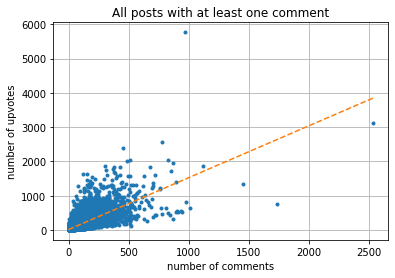

R² = 0.62


In [20]:
index_comments = 4
index_upvotes = 3

list_comments = []
list_upvotes = []

for row in hn_c:
    list_comments.append(int(row[index_comments]))
    list_upvotes.append(int(row[index_upvotes]))

lr = lin_reg(list_comments, list_upvotes)

a = lr[0]
b = lr[1]
r = lr[2]
plt.plot(list_comments, list_upvotes, r'.')
max_comments = max(list_comments)
plt.plot([0, max_comments], [b, a*max_comments+b], r'--')
plt.grid()
plt.xlabel('number of comments')
plt.ylabel('number of upvotes')
plt.title('All posts with at least one comment')
plt.show()
print('R² = {:.2f}'.format(r*r))

The data seems to be quite dispersed. The coefficient of determination is smaller than 0.63, indicating that there is no clear linear relation between the numbers of comments and upvotes. 

Let us now do the same for the “Ask HN” or “SHow HN” posts separately.

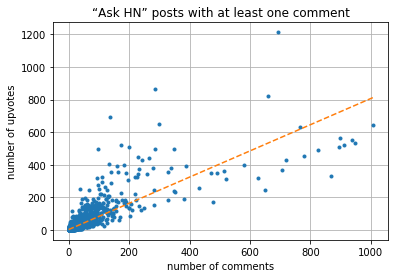

R² = 0.69


In [21]:
list_comments = []
list_upvotes = []

for row in ask_posts:
    list_comments.append(int(row[index_comments]))
    list_upvotes.append(int(row[index_upvotes]))

lr = lin_reg(list_comments, list_upvotes)

a = lr[0]
b = lr[1]
r = lr[2]
plt.plot(list_comments, list_upvotes, r'.')
max_comments = max(list_comments)
plt.plot([0, max_comments], [b, a*max_comments+b], r'--')
plt.grid()
plt.xlabel('number of comments')
plt.ylabel('number of upvotes')
plt.title('“Ask HN” posts with at least one comment')
plt.show()
print('R² = {:.2f}'.format(r*r))

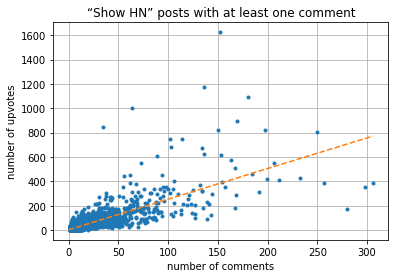

R² = 0.61


In [22]:
list_comments = []
list_upvotes = []

for row in show_posts:
    list_comments.append(int(row[index_comments]))
    list_upvotes.append(int(row[index_upvotes]))

lr = lin_reg(list_comments, list_upvotes)

a = lr[0]
b = lr[1]
r = lr[2]
plt.plot(list_comments, list_upvotes, r'.')
max_comments = max(list_comments)
plt.plot([0, max_comments], [b, a*max_comments+b], r'--')
plt.grid()
plt.xlabel('number of comments')
plt.ylabel('number of upvotes')
plt.title('“Show HN” posts with at least one comment')
plt.show()
print('R² = {:.2f}'.format(r*r))

There seems to be no clear relation between the numbers of comments and upvotes within the “Ask HN” or “Show HN” categories. Together with the previous result, this indicates that **optimizing for both the numbers of comments and upvotes would be difficult**. Our suggestion for someone willing to create a popular post is thus to *decide in advance which of these numbers to prioritize*.

## Conclusions 

In this project, we investigated the popularity Hacker News post in dependence of the kind of post and time of posting. 
We found that “Ask HN” posts created between 15:00 and 16:00 US Eastern Time (EST) are those receiving most comment. 
More generally, posts created between 12:00 and 16:00 US EST tend to be more popular than the others: it is thus the optimal window to post a link. 
On the contrary, those created between 20:00 and 24:00 EST are less popular. 
One should thus avoid posting a link at that time.
Finally, we found no clear correlation between the numbers of comments and upvotes. 
This suggests that a poster should choose whether to design a post to maximize the number of comments or upvotes that it receives.